Name: Shiska Raut <br>
ID:   1001526329

In [30]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [31]:
# read data
path = 'nba2021.csv'

df = pd.read_csv(path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  497 non-null    object 
 1   Pos     497 non-null    object 
 2   Age     497 non-null    int64  
 3   Tm      497 non-null    object 
 4   G       497 non-null    int64  
 5   GS      497 non-null    int64  
 6   MP      497 non-null    float64
 7   FG      497 non-null    float64
 8   FGA     497 non-null    float64
 9   FG%     497 non-null    float64
 10  3P      497 non-null    float64
 11  3PA     497 non-null    float64
 12  3P%     497 non-null    float64
 13  2P      497 non-null    float64
 14  2PA     497 non-null    float64
 15  2P%     497 non-null    float64
 16  eFG%    497 non-null    float64
 17  FT      497 non-null    float64
 18  FTA     497 non-null    float64
 19  FT%     497 non-null    float64
 20  ORB     497 non-null    float64
 21  DRB     497 non-null    float64
 22  TR

In [32]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1


Since there are a lot of attributes, not all attributes may be important for prediction position. For example, attributes like player name, Age and Team may not contribute towards making a good prediction and actually end up making the model unnecessarily complex. For those reasons, they will be dropped. In addition, 'TRB' is a sum of 'ORB' and 'DRB', attributes like 'FG%' can be obtained bt FG/FGA; therefore, they will also be dropped.

In [33]:
# df.drop(['Player', 'Age', 'Tm', 'TRB', 'FG%', '3P%', '2P%', 'FT%' ], axis = 1, inplace = True)
# df.drop(['Player', 'Age', 'Tm', 'TRB', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA'], axis = 1, inplace = True)
df.drop(['Player', 'Age', 'Tm', 'ORB', 'DRB', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', 'FT', 'FTA'], axis = 1, inplace = True)

df.head()

,Pos,G,GS,MP,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,PF,28,2,14.6,0.000,0.590,0.590,0.561,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,PG,6,0,2.8,0.000,0.167,0.125,0.000,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,C,27,27,28.1,0.000,0.606,0.603,0.468,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,C,26,26,33.6,0.400,0.576,0.576,0.841,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,C,18,18,26.7,0.358,0.525,0.529,0.762,4.3,1.9,0.4,0.9,0.9,1.5,14.1


### Get encoded labels and split data

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [35]:
len(df['Pos'].tolist())

497

In [36]:
# initialize label encoder and transform labels
le = LabelEncoder()
transformed_labels = pd.Series(le.fit_transform(df['Pos'].tolist()), name = "Position")

In [37]:
# add encoded labels as a new column and drop previous position column
df["Position"] = transformed_labels
df.drop(['Pos'], axis = 1, inplace = True)

In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Position'], axis = 1),
                                                    df['Position'], test_size = 0.25)

### Model Selection

As our data has a lot of attributes, using KNN would require standardization and distance predictions may get expensive. On the other hand, linear SVM would be much faster but require the classes to be separated by a linear descision boundary. Although descision trees are prone to overfitting, it can be avoided by using a tree of a fixed depth.

#### Descision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# create models with various depths
dtrees_list = []
for d in range(3, 20):
    dtrees_list.append(DecisionTreeClassifier(max_depth = d))
    
# train all trees
for dtree in dtrees_list:
    dtree.fit(X_train, y_train)

In [41]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for dtree in dtrees_list:
    tr_acc.append(dtree.score(X_train, y_train))
    test_acc.append(dtree.score(X_test, y_test))

#### Plot training vs test accuracy for various depths

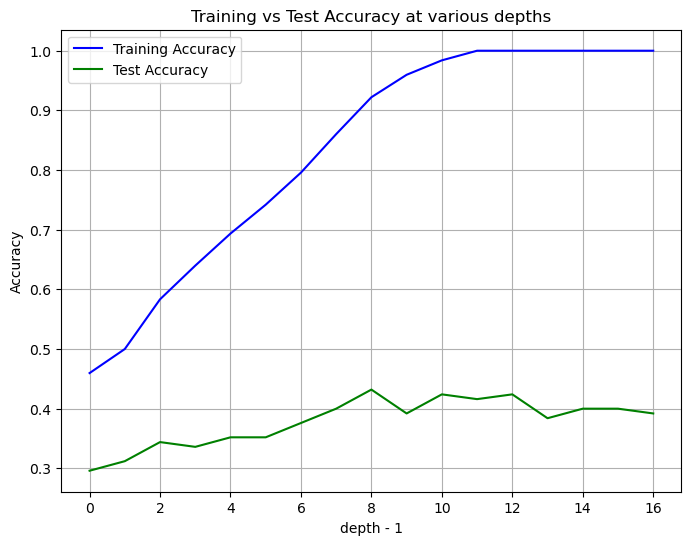

In [42]:
plt.figure(figsize = (8, 6))
plt.plot(tr_acc, color = "blue")
plt.plot(test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('depth - 1')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

#### SVM

In [43]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [44]:
# create models with various depths
svm_list = []

for C in range(1, 50, 2):
    svm_list.append(SVC(C = C, kernel = 'linear'))
    
# train all trees
for svm_model in svm_list:
    svm_model.fit(X_train, y_train)

In [45]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for svm_model in svm_list:
    tr_acc.append(svm_model.score(X_train, y_train))
    test_acc.append(svm_model.score(X_test, y_test))

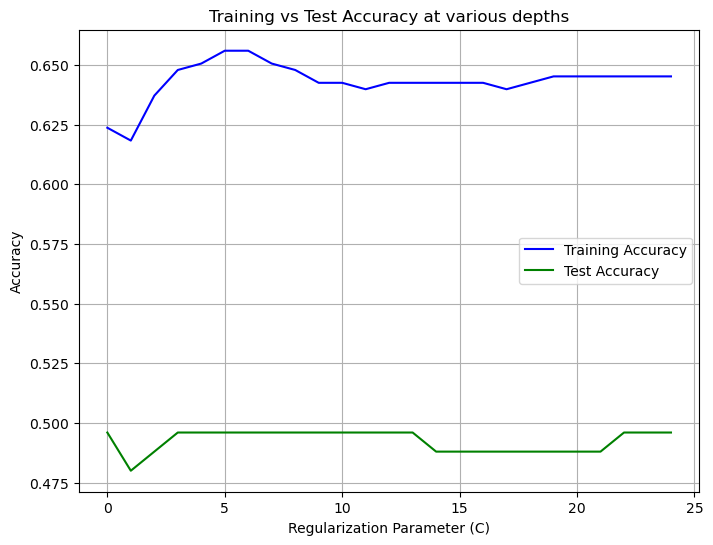

In [46]:
plt.figure(figsize = (8, 6))
plt.plot(tr_acc, color = "blue")
plt.plot(test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])

#### Gaussian NB

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
# create model and fit data
nb_model = GaussianNB().fit(X_train, y_train)

# get accuracy values
tr_acc = nb_model.score(X_train, y_train)
test_acc = nb_model.score(X_test, y_test)

print(f'Training accuracy: {tr_acc:0.3f}')
print(f'Test accuracy: {test_acc:0.3f}')

Training accuracy: 0.449
Test accuracy: 0.328


#### KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn_list = []

for k in range(1, 20):
    knn_list.append(KNeighborsClassifier(n_neighbors=k))


In [51]:
# import scaler
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
# train all trees
for knn_model in knn_list:
    knn_model.fit(X_train, y_train)

In [54]:
# get training and test accuracy for all trees
tr_acc = []
test_acc = []

for knn_model in knn_list:
    tr_acc.append(knn_model.score(X_train, y_train))
    test_acc.append(knn_model.score(X_test, y_test))

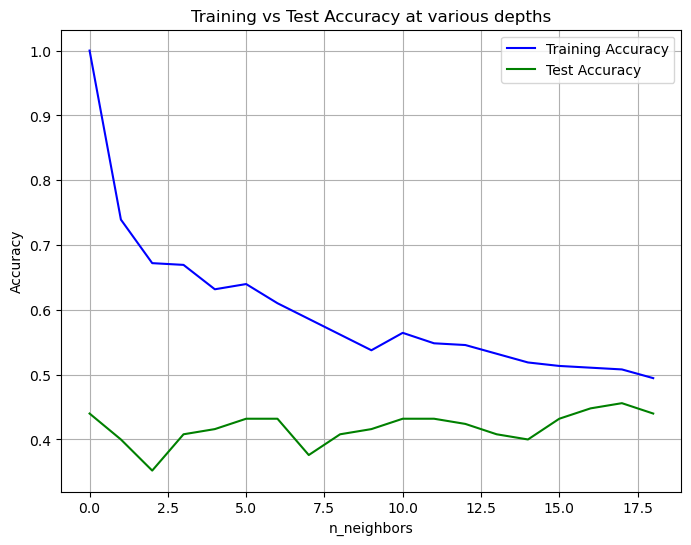

In [55]:
plt.figure(figsize = (8, 6))
plt.plot(tr_acc, color = "blue")
plt.plot(test_acc, color = "green")
plt.grid()
plt.title('Training vs Test Accuracy at various depths')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'])